In [35]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import TwoSlopeNorm


Plot the zeta value for late case B MT and beyond, i.e. stars that are beyond the HG type in COMAPS

This is eq. 27 from the [COMPAS method paper](https://arxiv.org/abs/2109.10352) (which comes from Sobermann 97)

In [36]:
def zeta_sph(m_sph):
    term1 = (2/3) * (m_sph / (1 - m_sph))
    term2 = -(1/3) * ((1 - m_sph) / (1 + 2 * m_sph))
    term3 = -0.03 * m_sph
    term4 = 0.2 * (m_sph / (1 + (1 - m_sph)**(-6)))
    
    zeta_sph_value = term1 + term2 + term3 + term4
    return zeta_sph_value


We know how $\zeta_{RL}$ is a function of the mass ratio $M_{donor}/M_{accretor}$
see [this notebook](https://github.com/LiekeVanSon/LowMBH_and_StableChannel/blob/master/Code/AppendixFig6_zeta_q_beta_relations.ipynb)

i.e. [Fig 6 from van Son et al](https://ui.adsabs.harvard.edu/abs/2022ApJ...940..184V/abstract)).

In [37]:
def part1(q, beta):
    """    
    dln(a)/dln m_d
    note q == m_donor/m_accretor
    """
    return -2 * (1 - beta*q - (1 - beta) * (q + 1./2.) * (q / (q + 1) )  )

def part2(q):
    """
    dln(Rl/a)/dlnq
    note q == m_donor/m_accretor
    """
    A = (q**(1./3.)) / 3.
    B = 2./(q**(1./3.))
    C = (  1.2 * q**(1./3.) +  1./(1. + q**(1./3)) ) / (0.6 * q**(2./3.) + np.log(1 + q**(1./3.) ) )
    return A * (B - C)
    
def part3(q, beta):
    """
    dln(q)/dln m
    note q == m_donor/m_accretor
    """
    return 1 + beta*q

def zeta_RL(q_list, B):
    """
    q_list : List of mass ratios (m_donor/m_accretor, can range from ~0.2 to 5)
    B : beta accretion efficiency
    """
    return part1(q_list, B) + (part2(q_list) * part3(q_list, B))

import numpy as np



In [46]:
# Define the mdonor_m_accretor array (mass ratios)
mdonor_m_accretor = np.arange(0.2, 5, 0.1)


# Call the zeta_RL function with q_list and beta
zeta_RL_values = zeta_RL(mdonor_m_accretor, 0.5)

# Print the result
print(zeta_RL_values)


[-1.3793205  -1.20926781 -1.03304518 -0.85227205 -0.6679737  -0.48086396
 -0.29146661 -0.10017925  0.0926889   0.28689278  0.48223524  0.6785556
  0.87572149  1.07362282  1.27216725  1.47127672  1.67088481  1.87093464
  2.07137723  2.27217018  2.4732766   2.67466427  2.8763049   3.0781736
  3.28024833  3.48250958  3.68493997  3.88752398  4.09024775  4.29309883
  4.496066    4.69913917  4.90230922  5.10556788  5.30890766  5.51232173
  5.71580388  5.91934847  6.12295029  6.32660463  6.53030714  6.73405383
  6.93784105  7.14166541  7.34552383  7.54941342  7.75333155  7.95727577]


/var/folders/mc/hhcvbs7n2jq7d_hr2d6qvjhm0000gq/T/ipykernel_90268/717185525.py:2: RuntimeWarning: divide by zero encountered in divide
  term1 = (2/3) * (m_sph / (1 - m_sph))
/var/folders/mc/hhcvbs7n2jq7d_hr2d6qvjhm0000gq/T/ipykernel_90268/717185525.py:5: RuntimeWarning: divide by zero encountered in power
  term4 = 0.2 * (m_sph / (1 + (1 - m_sph)**(-6)))


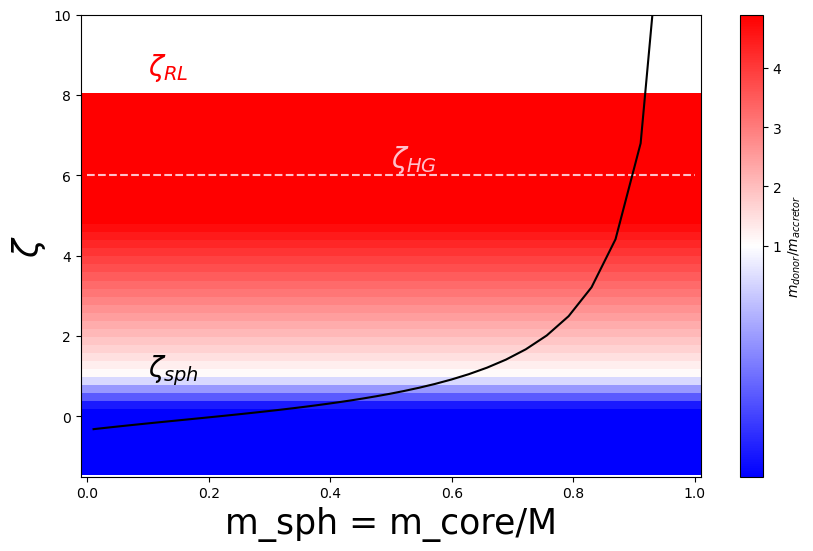

In [47]:
xes = np.logspace(-2, 0, 100)


plt.figure(figsize=(10, 6))


# zeta_eff for stellar type = HG in COMAPS
plt.hlines(6, 0, 1, color = 'pink', linestyle = '--')
plt.text(0.5, 6.2, "$\zeta_{HG}$", size = 20, c= 'pink')

# zeta_eff for stellar types beyond HG from Sobermann equation (as in COMPAS)
plt.plot(xes, zeta_sph(xes), color = 'k')
plt.text(0.1, 1., "$\zeta_{sph}$", size = 20, c= 'k')


# Value of zeta_RL
plt.text(0.1, 8.5, "$\zeta_{RL}$", size = 20, c= 'red')

# Create a 2D grid for m_sph and zeta_RL_values
m_sph = np.linspace(0, 1, len(zeta_RL_values))
M_sph, Zeta_RL = np.meshgrid(m_sph, zeta_RL_values)

# Define the normalization with the midpoint at 1 (for colors)
norm = TwoSlopeNorm(vmin=np.min(q_list), vcenter=1, vmax=np.max(q_list))

# Plot the grid using pcolormesh
c = plt.pcolormesh(M_sph, Zeta_RL, Zeta_RL, shading='auto', cmap='bwr', norm = norm)

# Add a colorbar to reflect the mdonor_m_accretor values
plt.colorbar(c, label='$m_{donor} /m_{accretor}$')

# plt.fill_between(xes, y1 = -1, y2 = 7, alpha = 0.2, color = 'grey')

# PLot values
plt.xlabel("m_sph = m_core/M", size = 25)
plt.ylabel("$\zeta$", size = 25)
plt.ylim(-1.5,10)
plt.savefig("../../plots/zeta_values.png")
plt.show()

Remember Mass transfer is stable when $\zeta_{RL} < \zeta_{eff}$
and $\zeta_{eff} = \zeta_{HG}$ for HG stars, or  $\zeta_{eff} = \zeta_{sph}$  for higher stellar types

$\zeta_{RL}$ ranges beteen about -1 and 7 (